In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

In [ ]:

data = pd.read_csv("banking.csv", header=0)
data=data.dropna()
print (data.shape)
print (list(data.columns))

In [ ]:
data.head()

In [ ]:
data['education'].unique()

**DATA EXPLORATION**



In [ ]:
data['y'].value_counts()

In [ ]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

In [49]:

data['y'] = pd.to_numeric(data['y'], errors='coerce')


In [50]:
pd.DataFrame(data.groupby(['job'])['y'].mean())


,y
job,
admin.,0.129726
blue-collar,0.068943
entrepreneur,0.085165
housemaid,0.100000
management,0.112175
retired,0.252326
self-employed,0.104856
services,0.081381
student,0.314286


In [48]:
df=pd.DataFrame(data)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,False,False,False,False,True,False,False,False,True,False
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,False,False,True,False,False,False,False,False,True,False
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,False,False,False,False,True,False,False,False,False,True
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,False,False,True,False,False,False,False,False,True,False
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,False,False,False,False,True,False,False,False,True,False
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,False,False,False,False,True,False,False,False,True,False
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,False,False,False,False,False,False,True,False,True,False
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,True,False,False,False,False,True,False,False,True,False


In [72]:
df['y'] = df['y'].astype(float)
df = df[df['y'].apply(lambda x: isinstance(x, (int, float)))]
df['y'].value_counts()



y
0.0    36548
1.0     4640
Name: count, dtype: int64

**Visualization**


*   Purchase Frequency for Job Title




In [ ]:
%matplotlib inlinePurchase Frequency for Job Title
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')



* * Stacked Bar Chart of Marital Status vs Purchase*




In [ ]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

* Stacked Bar Chart of Education vs Purchase

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

* Purchase Frequency for Day of Week

In [ ]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

* Purchase Frequency for Month

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Histogram of Age

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

* Purchase Frequency for Poutcome

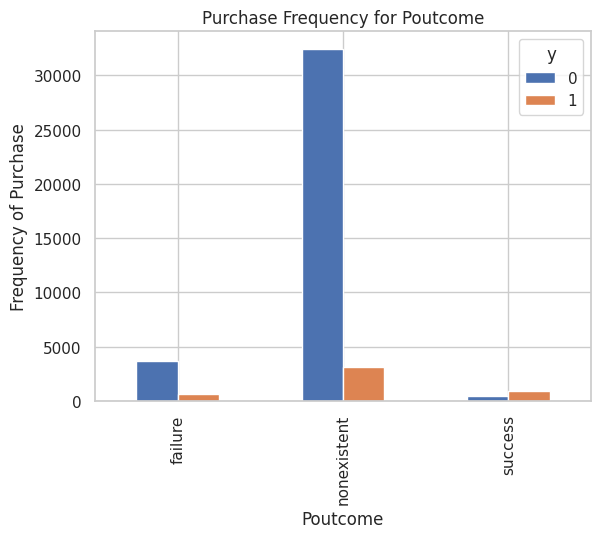

In [23]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

**Create dummy variables**

That is variables with only two values, zero and one.

In [24]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [25]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

**Over-sampling using SMOTE**

In [26]:
!pip install --upgrade imblearn

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Recursive Feature Elimination**

In [30]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False False False
 False False False  True  True False  True False  True False  True  True
  True False  True False False  True False  True  True  True False False
 False  True False  True  True False  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
 False False False]
[3 3 2 3 2 2 2 3 2 3 2 3 2 3 2 1 1 3 1 2 1 3 1 1 1 3 1 3 3 1 3 1 1 1 2 3 3
 1 3 1 1 3 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 3 2 3]


In [31]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown',
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

### **Implementing the model**

In [56]:
y = y.astype(float)
X = X.astype(float)

In [57]:
import statsmodels.api as sm

result=sm.Logit(y,X).fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.452474
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.347     
Date:                 2024-06-12 05:44  AIC:               46305.6039
No. Observations:     51134             BIC:               46447.0792
Df Model:             15                Log-Likelihood:    -23137.   
Df Residuals:         51118             LL-Null:           -35443.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7705   0.0079 -97.4824 0.0000 -0.7860 -0.7550
job_blue-collar 

In [58]:
y = y.astype(float)
X = X.astype(float)

In [60]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate',
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']
y = y.astype(float)
X = X.astype(float)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.452474
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.347     
Date:                 2024-06-12 05:46  AIC:               46305.6039
No. Observations:     51134             BIC:               46447.0792
Df Model:             15                Log-Likelihood:    -23137.   
Df Residuals:         51118             LL-Null:           -35443.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7705   0.0079 -97.4824 0.0000 -0.7860 -0.7550
job_blue-collar 

## **LOGISTIC REGRESSION  MODEL**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# **Predicting the test set results and calculating the accuracy**

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


# **Confusion Matrix**

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6879  787]
 [2014 5661]]


**Compute precision, recall, F-measure and support**

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      7666
         1.0       0.88      0.74      0.80      7675

    accuracy                           0.82     15341
   macro avg       0.83      0.82      0.82     15341
weighted avg       0.83      0.82      0.82     15341



**Interpretation:** Of the entire test set, 82% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 82% of the customer’s preferred term deposits that were promoted.

**ROC Curve**

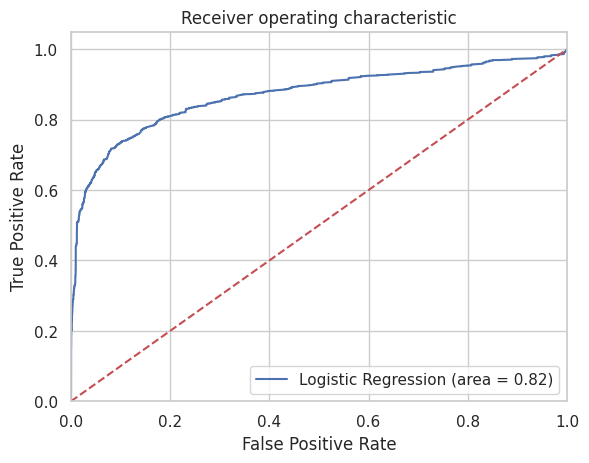

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()